# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [93]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [94]:
data, meta = arff.loadarff('MagicTelescopeDataset.arff')

df = pd.DataFrame(data)
df.columns = df.columns.str.replace(":", "")
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
y = (y == 'g').astype(int)

random_state = np.random.randint(0, 100)
train_accuracies = []
test_accuracies = []

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

    knn.fit(X_train, y_train)
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Run {_ + 1}")
    print(f"  Train Accuracy: {train_accuracy:.3f}")
    print(f"  Test Accuracy: {test_accuracy:.3f}")

avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)
print(f"\nAverage accuracy:")
print(f"  Average Train Accuracy: {avg_train_accuracy:.3f}")
print(f"  Average Test Accuracy: {avg_test_accuracy:.3f}")


Run 1
  Train Accuracy: 0.885
  Test Accuracy: 0.804
Run 2
  Train Accuracy: 0.885
  Test Accuracy: 0.804
Run 3
  Train Accuracy: 0.885
  Test Accuracy: 0.804
Run 4
  Train Accuracy: 0.885
  Test Accuracy: 0.804
Run 5
  Train Accuracy: 0.885
  Test Accuracy: 0.804

Average accuracy:
  Average Train Accuracy: 0.885
  Average Test Accuracy: 0.804


Discussion

**It seems as though the manhatan distance (p=1) did *slightly* better than the other 3 that I used. It appeared as though 1, 2, and 3 all did very similar in terms of both train and test accuracy**

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [95]:
from sklearn.metrics import accuracy_score

data, meta = arff.loadarff('MagicTelescopeDataset.arff')

df = pd.DataFrame(data)
df.columns = df.columns.str.replace(":", "")
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
y = (y == 'g').astype(int)

random_state = np.random.randint(0, 100)
train_accuracies = []
test_accuracies = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

    knn.fit(X_train, y_train)
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Run {i + 1}")
    print(f"  Train Accuracy: {train_accuracy:.3f}")
    print(f"  Test Accuracy: {test_accuracy:.3f}")

avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)
print(f"\nAverage accuracy:")
print(f"  Average Train Accuracy: {avg_train_accuracy:.3f}")
print(f"  Average Test Accuracy: {avg_test_accuracy:.3f}")

Run 1
  Train Accuracy: 0.889
  Test Accuracy: 0.785
Run 2
  Train Accuracy: 0.889
  Test Accuracy: 0.785
Run 3
  Train Accuracy: 0.889
  Test Accuracy: 0.785
Run 4
  Train Accuracy: 0.889
  Test Accuracy: 0.785
Run 5
  Train Accuracy: 0.889
  Test Accuracy: 0.785

Average accuracy:
  Average Train Accuracy: 0.889
  Average Test Accuracy: 0.785


*Discussion*

**Not exactly sure what to say here. Everything looks great, normal train and test accuracies. Could be better, but we'll see. I had to do this twice because the first time I was getting accuracies of 1 for some reason. I have literally no clue why that was happening**

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [96]:
from sklearn.preprocessing import MinMaxScaler

data, meta = arff.loadarff('MagicTelescopeDataset.arff')
df = pd.DataFrame(data)
df.columns = df.columns.str.replace(":", "")
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
y = (y == 'g').astype(int)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

num_runs = 5
train_accuracies = []
test_accuracies = []

for i in range(num_runs):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=None)

    knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Run {i + 1}:")
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy:  {test_accuracy:.4f}")
    print()

print("Average Results:")
print(f"  Average Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"  Average Test Accuracy:  {np.mean(test_accuracies):.4f}")


Run 1:
  Train Accuracy: 0.9010
  Test Accuracy:  0.8352

Run 2:
  Train Accuracy: 0.9000
  Test Accuracy:  0.8265

Run 3:
  Train Accuracy: 0.9005
  Test Accuracy:  0.8357

Run 4:
  Train Accuracy: 0.9017
  Test Accuracy:  0.8344

Run 5:
  Train Accuracy: 0.9004
  Test Accuracy:  0.8336

Average Results:
  Average Train Accuracy: 0.9007
  Average Test Accuracy:  0.8331


*Discuss the results of using normalized data vs. unnormalized data*

**It looks like normalizing the data got us a marginal increase in accuracy. For how simple it was to implement, I'd say this was for sure worth the effort to get better results, even marginal ones.**

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [97]:
from sklearn.preprocessing import MinMaxScaler

data, meta = arff.loadarff('MagicTelescopeDataset.arff')

df = pd.DataFrame(data)
df.columns = df.columns.str.replace(":", "")
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
y = (y == 'g').astype(int)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

num_runs = 5
train_accuracies = []
test_accuracies = []

for i in range(num_runs):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=None)

    knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Run {i + 1}:")
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy:  {test_accuracy:.4f}")
    print()

print("Average Results:")
print(f"  Average Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"  Average Test Accuracy:  {np.mean(test_accuracies):.4f}")


Run 1:
  Train Accuracy: 1.0000
  Test Accuracy:  0.8268

Run 2:
  Train Accuracy: 1.0000
  Test Accuracy:  0.8328

Run 3:
  Train Accuracy: 1.0000
  Test Accuracy:  0.8344

Run 4:
  Train Accuracy: 1.0000
  Test Accuracy:  0.8247

Run 5:
  Train Accuracy: 1.0000
  Test Accuracy:  0.8339

Average Results:
  Average Train Accuracy: 1.0000
  Average Test Accuracy:  0.8305


Comparison and Discussion

**It seems that doing both is unhelpful. It seems like it has overfit the train set, which gives us a 100% accuracy on the train set, but almost no improvement to the test set. It would seem this should be avoided for this reason.**

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.

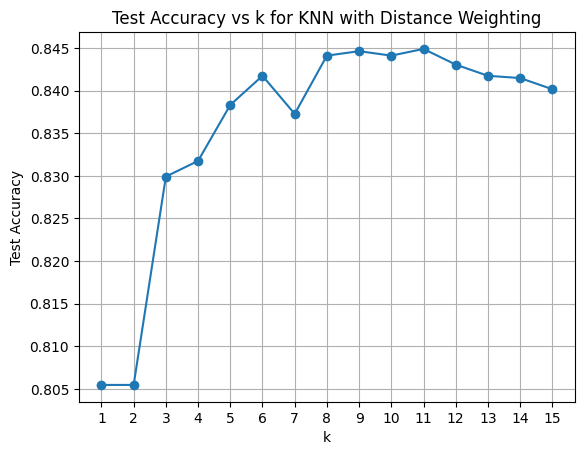

In [98]:
import matplotlib.pyplot as plt
import numpy as np

k_values = range(1, 16)
test_accuracies_k = []

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies_k.append(test_accuracy)

plt.plot(k_values, test_accuracies_k, marker='o')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs k for KNN with Distance Weighting')
plt.xticks(k_values)
plt.grid(True)
plt.show()


*Discussion*

**Based on this graph, it looks like using too many neighbors can actually be a bad thing. Using too few is significantly worse, but it looks like there's a sweet spot at about 8-11 neighbors for this particular dataset**


**I was curious at what k value the accuracy significantly diminishes, becoming worse than using 1 or 2 neighbors. I went up to 160 neighbors, and though it steadily decreased after 11 neighbors, it never went below 1 or 2 neighbors.**

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

*Discuss the innapropriate feature*

**The inappropriate feature is the B attribute, which introduces the amount of black residents in the town. This is a serious problem, because it introduces race into the calculation, which will cause bias an discrimination based on skin color. This should be avoided at all costs, just like how if a model that selects the next company CEO is given gender, it will always choose a male, because historically males have been CEOs. This is a significant oversight.**

### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def knn(df, k=3, normalize=False, distance_weighting=False):
    X = df.drop(columns=['MEDV'])
    y = df['MEDV']

    if normalize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if distance_weighting:
        knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    else:
        knn = KNeighborsRegressor(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    print(f"Normalization: {normalize}, Distance Weighting: {distance_weighting}")
    print(f"Training R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
    print(f"Training MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
    print("-" * 40)
    return mae_test

data, meta = arff.loadarff("HousingPricePredictionDataset.arff")
df = pd.DataFrame(data)
df = df.apply(pd.to_numeric)

# 1: No normalization, no distance weighting
knn(df, k=3, normalize=False, distance_weighting=False)

# 2: Normalization, no distance weighting
knn(df, k=3, normalize=True, distance_weighting=False)

# 3: Normalization, distance weighting
knn(df, k=3, normalize=True, distance_weighting=True)

Normalization: False, Distance Weighting: False
Training R²: 0.7726, Test R²: 0.5221
Training MAE: 3.0643, Test MAE: 3.8765
----------------------------------------
Normalization: True, Distance Weighting: False
Training R²: 0.9038, Test R²: 0.8240
Training MAE: 1.7970, Test MAE: 2.3722
----------------------------------------
Normalization: True, Distance Weighting: True
Training R²: 1.0000, Test R²: 0.8268
Training MAE: 0.0000, Test MAE: 2.3362
----------------------------------------


2.336194614627695

*Discuss your results*

**This matches up strongly with the classification problem. Using normalization gives a boost to accuracy, while using normalization AND distance weighting may be overfitting the train set, while not giving a significant boost to the test set. It seems that just normalization may be good**

**I"m curious what would happen if I just did distance weighting without normalization. I'm curious if it would be better or worse than with just normalization**

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

Normalization: True, Distance Weighting: True
Training R²: 1.0000, Test R²: 0.8024
Training MAE: 0.0000, Test MAE: 2.4480
----------------------------------------
Normalization: True, Distance Weighting: True
Training R²: 1.0000, Test R²: 0.8281
Training MAE: 0.0000, Test MAE: 2.2689
----------------------------------------
Normalization: True, Distance Weighting: True
Training R²: 1.0000, Test R²: 0.8268
Training MAE: 0.0000, Test MAE: 2.3362
----------------------------------------
Normalization: True, Distance Weighting: True
Training R²: 1.0000, Test R²: 0.8188
Training MAE: 0.0000, Test MAE: 2.4290
----------------------------------------
Normalization: True, Distance Weighting: True
Training R²: 1.0000, Test R²: 0.8187
Training MAE: 0.0000, Test MAE: 2.4665
----------------------------------------
Normalization: True, Distance Weighting: True
Training R²: 1.0000, Test R²: 0.8036
Training MAE: 0.0000, Test MAE: 2.5159
----------------------------------------
Normalization: True, D

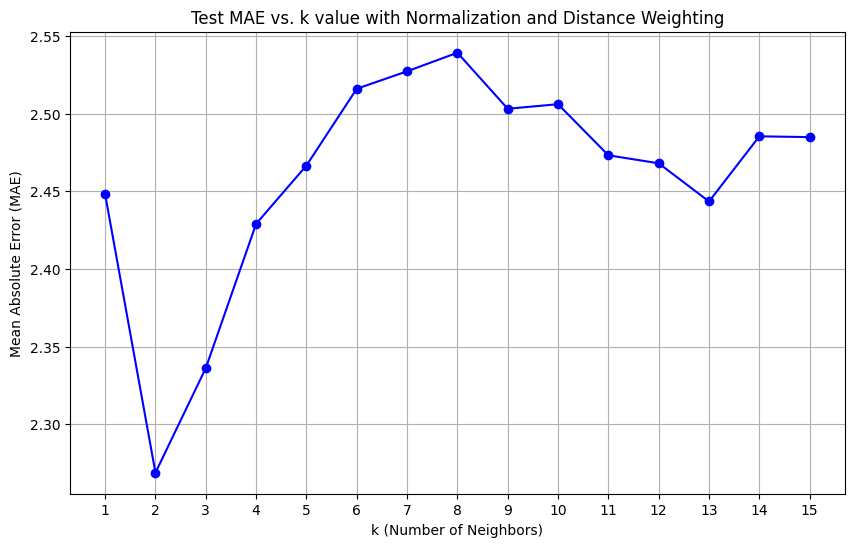

In [100]:
import matplotlib.pyplot as plt
import numpy as np

mae_values = []

for k in range(1, 16):
    mae_test = knn(df, k=k, normalize=True, distance_weighting=True)
    mae_values.append(mae_test)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), mae_values, marker='o', linestyle='-', color='b')
plt.title('Test MAE vs. k value with Normalization and Distance Weighting')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(np.arange(1, 16, 1))
plt.grid(True)
plt.show()


Discussion

**It appears as though (just like with classification), around 6-9 neighbors nets the best results.**

**A difference here however is that the results don't appear to decline linearly. Based on the graph, after 4 iterations, it is relatively stable. Whether this trend will continue up to a high number or not, I'm not sure. I'm also not sure if 14 and 15 being the same was just a fluke, or whether it was indicative of future behavior.**

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [101]:
from sklearn.preprocessing import LabelEncoder

data, meta = arff.loadarff("LymphDataset.arff")
df = pd.DataFrame(data)

le = LabelEncoder()
nominal_features = ['lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass',
                    'extravasates', 'regeneration_of', 'early_uptake_in', 'changes_in_lym',
                    'defect_in_node', 'changes_in_node', 'changes_in_stru', 'special_forms',
                    'dislocation_of', 'exclusion_of_no', 'class']

for feature in nominal_features:
    df[feature] = le.fit_transform(df[feature].astype(str))

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

continuous_features = ['lym_nodes_dimin', 'lym_nodes_enlar', 'no_of_nodes_in']
continuous_indices = [X.columns.get_loc(col) for col in continuous_features]
nominal_indices = [i for i in range(len(X.columns)) if i not in continuous_indices]

def mydist(x1, x2):

    continuous_dist = np.sqrt(np.sum((x1[continuous_indices] - x2[continuous_indices])**2))
    nominal_dist = np.sum(x1[nominal_indices] != x2[nominal_indices])

    return continuous_dist + nominal_dist

k = 8
clf = KNeighborsClassifier(n_neighbors=k, metric=mydist)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


*Explain your distance metric and discuss your results*

**My distance metric uses both a continous distance and a nominal distance, and adds them together at the end. It skips over the continuous distance if the values are nominal, and vice versa if the values are continuous.**

**The accuracy value leads me to believe that my distance metric worked though, because the accuracy is about what I'd expect based on the previous datasets I've tried with knn**

## 5. (Optional 15% extra credit) Code up your own KNN Learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results

*Discussion*

In [102]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0